<a href="https://colab.research.google.com/github/shyambaskar07/SandyVision-Automating-Seashore-Cleanliness-with-CNNs/blob/main/SandyVision_Automating_Seashore_Cleanliness_with_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting to drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Defining Dataset and Data Augmentation

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining dataset path
DATASET_PATH = "/content/drive/MyDrive/Mine/Plastic on Sand"

# Image preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load training and validation datasets
train_ds = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_ds = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)


Found 168 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [3]:
print(train_ds.class_indices)
print(train_ds.classes)

{'Clean': 0, 'Dirt': 1}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Building a CNN Model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Building a simple CNN model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

from tensorflow.keras.regularizers import l2
Dense(64, activation="relu", kernel_regularizer=l2(0.01))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Dense name=dense_2, built=False>

# Compile and Train Model

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.4971 - loss: 0.7113 - val_accuracy: 0.5238 - val_loss: 0.6888
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 941ms/step - accuracy: 0.5377 - loss: 0.7073 - val_accuracy: 0.5238 - val_loss: 0.6811
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4718 - loss: 0.6970 - val_accuracy: 0.5952 - val_loss: 0.6822
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5865 - loss: 0.6823 - val_accuracy: 0.5238 - val_loss: 0.6852
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5719 - loss: 0.6691 - val_accuracy: 0.6667 - val_loss: 0.6718
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6932 - loss: 0.6563 - val_accuracy: 0.6190 - val_loss: 0.6667
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6357 - loss: 0.6581 - val_accuracy: 0.5952 - val_loss: 0.6612
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6575 - loss: 0.6213 - val_accuracy: 0.5952 - val_loss: 0.6472
Epoch 9/20


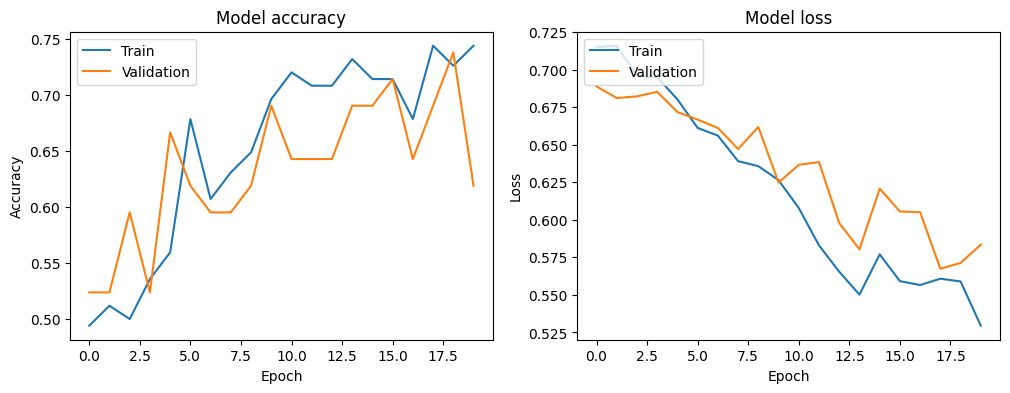

In [5]:
# Compile model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])


# Train model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Prediction for test Image

In [6]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_new_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        print("Predicted: CLEAN")
        print(prediction[0][0])
    else:
        print("Predicted: DIRT")
        print(prediction[0][0])

    return prediction



# Saving Model

In [7]:
model.save("/content/dirt_clean_classifier.h5")

# GRADIO

In [8]:
!pip install gradio

# Loading Model

In [9]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/dirt_clean_classifier.h5")


In [10]:
model = tf.keras.models.load_model("/content/dirt_clean_classifier.h5")

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import gradio as gr
model = tf.keras.models.load_model("/content/dirt_clean_classifier.h5")

class_labels = ["Clean", "Dirt"]

def predict(img):
    img = img.resize((128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    result = class_labels[int(prediction > 0.5)]
    return result

# Create Gradio interface
gr_interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Dirt vs Clean Image Classifier",
    description="Upload an image and let the model classify whether it is clean or dirt."
)

gr_interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ce2ed2bf28f8d0e78e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
